<a href="https://colab.research.google.com/github/Greta-gerasimov/NN/blob/NN4/NN4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает


2.Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

In [ ]:
!pip install keras
!pip install np_utils

In [ ]:

import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from tensorflow.python.keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.python.keras.optimizers import *
from tensorflow import keras
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score
import pandas as pd


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Checking the number of unique classes
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

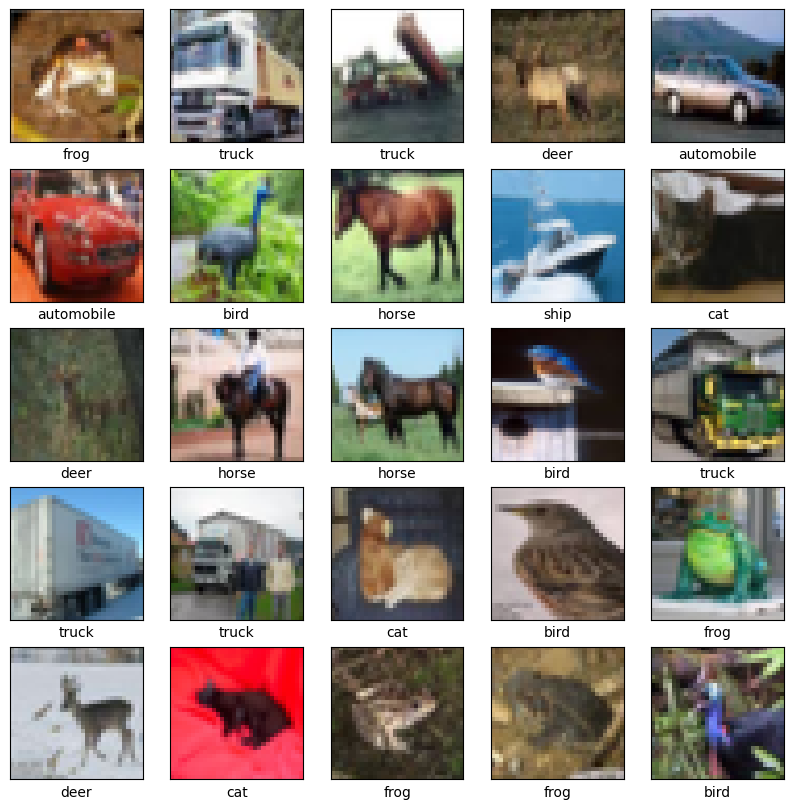

In [ ]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [ ]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [ ]:
result_dense = []

In [ ]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
epochs =15
history = model.fit(train_images, train_labels, batch_size=64, epochs=epochs,
                    validation_data=(test_images, test_labels))
 #Evaluate the model
test_scores3 = model.evaluate(
          test_images,
          test_labels
      )

# накопление результатов
mod_name = f'cnn + adam'
mod_accuracy = history.history['accuracy'][epochs-1]
mod_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
782/782 [==============================] - 30s 14ms/step - loss: 1.7491 - accuracy: 0.3977 - val_loss: 1.4800 - val_accuracy: 0.5015
Epoch 2/15
782/782 [==============================] - 11s 14ms/step - loss: 1.1880 - accuracy: 0.5767 - val_loss: 1.0406 - val_accuracy: 0.6267
Epoch 3/15
782/782 [==============================] - 14s 18ms/step - loss: 0.9993 - accuracy: 0.6464 - val_loss: 1.0414 - val_accuracy: 0.6402
Epoch 4/15
782/782 [==============================] - 11s 14ms/step - loss: 0.8901 - accuracy: 0.6903 - val_loss: 0.8481 - val_accuracy: 0.6976
Epoch 5/15
782/782 [==============================] - 10s 13ms/step - loss: 0.8113 - accuracy: 0.7185 - val_loss: 0.8668 - val_accuracy: 0.7012
Epoch 6/15
782/782 [==============================] - 10s 13ms/step - loss: 0.7565 - accuracy: 0.7369 - val_loss: 0.7195 - val_accuracy: 0.7525
Epoch 7/15
782/782 [==============================] - 10s 13ms/step - loss: 0.7177 - accuracy: 0.7520 - val_loss: 0.6876 - val_accuracy:

Text(0.5, 1.0, 'Loss Curves')

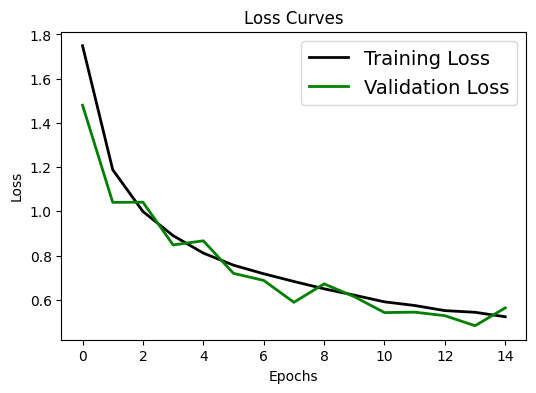

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

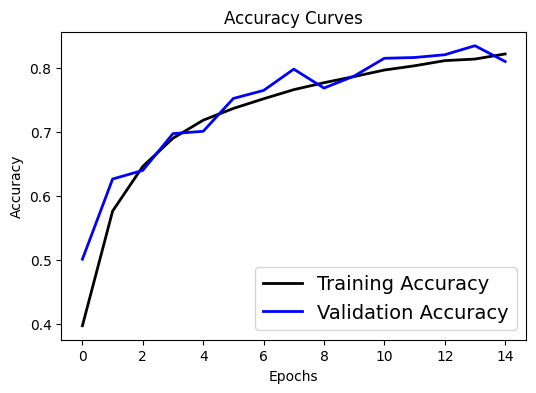

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.4117613e-06 4.2763436e-06 1.7525310e-04 ... 1.3808854e-05
  1.7442615e-05 1.5079331e-06]
 [5.8978691e-05 2.4363028e-03 5.7105746e-07 ... 3.9417582e-08
  9.9749243e-01 1.0638081e-05]
 [5.8355029e-03 3.6717799e-02 2.1143528e-02 ... 3.0852252e-04
  9.2780358e-01 1.1104126e-03]
 ...
 [2.9022807e-08 4.3749952e-07 2.6518170e-04 ... 2.8795691e-04
  7.5881438e-08 2.1623248e-07]
 [5.6104124e-02 8.8692361e-01 1.8567044e-03 ... 2.4550571e-04
  4.3187151e-03 2.9411938e-03]
 [3.1111711e-06 1.7500472e-06 3.5574107e-05 ... 9.8910785e-01
  7.1874547e-07 4.3738456e-07]]
[3 8 8 ... 5 1 7]


простейшая СНС дала неплохие результаты. попробую ее модифицировать и усложнить

1. Использование иного оптимизатора


In [ ]:
#SDG

# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Checking the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(optimizer='SGD', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(train_images, train_labels, batch_size=64, epochs=epochs,
                    validation_data=(test_images, test_labels))
 #Evaluate the model
test_scores3 = model.evaluate(
          test_images,
          test_labels
      )

# накопление результатов
mod_name = f'cnn + sgd'
mod_accuracy = history.history['accuracy'][epochs-1]
mod_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
782/782 [==============================] - 15s 16ms/step - loss: 2.0738 - accuracy: 0.3109 - val_loss: 1.9885 - val_accuracy: 0.3695
Epoch 2/15
782/782 [==============================] - 13s 17ms/step - loss: 1.5383 - accuracy: 0.4397 - val_loss: 1.6427 - val_accuracy: 0.4266
Epoch 3/15
782/782 [==============================] - 14s 18ms/step - loss: 1.3939 - accuracy: 0.4916 - val_loss: 1.6300 - val_accuracy: 0.3850
Epoch 4/15
782/782 [==============================] - 13s 17ms/step - loss: 1.2951 - accuracy: 0.5320 - val_loss: 1.6588 - val_accuracy: 0.4322
Epoch 5/15
782/782 [==============================] - 14s 18ms/step - loss: 1.2178 - accuracy: 0.5631 - val_loss: 1.2736 - val_accuracy: 0.5489
Epoch 6/15
782/782 [==============================] - 13s 17ms/step - loss: 1.1641 - accuracy: 0.5820 - val_loss: 1.2305 - val_accuracy: 0.5617
Epoch 7/15
782/782 [==============================] - 14s 17ms/step - loss: 1.1234 - accuracy: 0.5985 - val_loss: 1.2205 - val_accuracy:

Text(0.5, 1.0, 'Loss Curves')

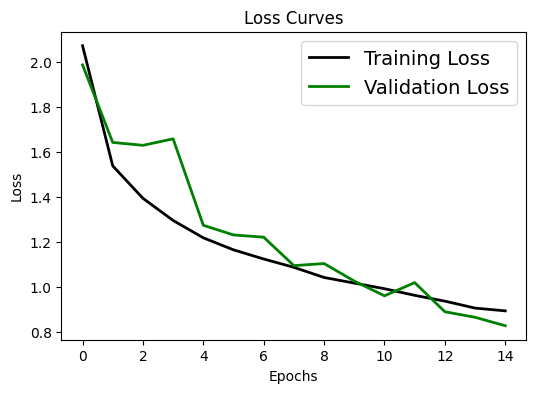

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

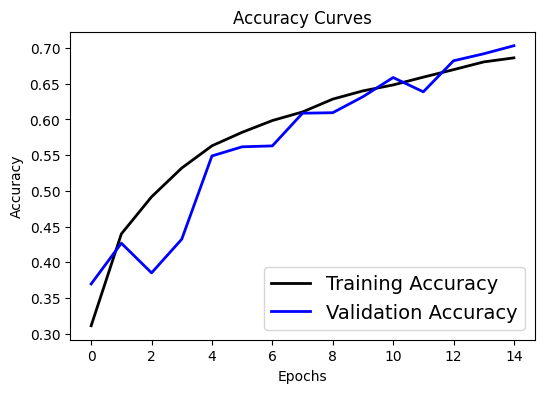

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)


313/313 [==============================] - 1s 4ms/step
[[7.86321354e-04 6.50804373e-04 8.46189912e-03 ... 1.94064574e-03
  4.32041660e-02 1.49846182e-03]
 [1.29070561e-02 1.58697799e-01 2.51387955e-05 ... 8.10918937e-06
  8.18914890e-01 9.33621544e-03]
 [1.15307672e-02 4.79793875e-03 6.43528707e-04 ... 2.37756074e-04
  9.75007772e-01 5.63756516e-03]
 ...
 [1.68583283e-05 1.38199846e-06 4.16284986e-03 ... 4.62160818e-03
  4.74926601e-05 1.53046913e-05]
 [1.30584449e-01 2.14190617e-01 4.96347398e-02 ... 1.05429832e-02
  3.70347798e-02 4.95595671e-03]
 [2.19326794e-05 9.13641634e-06 6.27025322e-04 ... 9.54625785e-01
  1.17543705e-05 3.86569009e-05]]
[3 8 8 ... 5 4 7]


In [ ]:
# Оценка accuracy
pd.DataFrame(result_dense, columns=['mod_name','mod_accuracy','mod_val_accuracy', 'test_accuracy']).sort_values('mod_val_accuracy',ascending=False)

,mod_name,mod_accuracy,mod_val_accuracy,test_accuracy
0,cnn + adam,0.82192,0.8102,0.8102
1,cnn + sgd,0.68638,0.7034,0.7034


Вопросы:
1. правильно ли я понимаю, что построенная мной выше архитектура НС - это  ResNet-подобная архитектура?
2. существует ли какая-то еще штука для аугументации данных, ниже представлен код с использованием ImageDataGenerator и там все плохо.
Спасибо!

##**ResNet50** c аугументацией(**ImageDataGenerator**)##





Обучение СНС на датасете cifar10 используя ускоритель ResNet50

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50


from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
# Установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 15

In [ ]:
# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# Создание генераторов для обучающей и тестовой выборок
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation ='relu'))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation ="relu"))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['accuracy'])

In [ ]:
#train model
history=model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)


  # Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15


<ipython-input-42-f7bbe4d07476>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


781/781 [==============================] - 678s 868ms/step - loss: 0.5100 - accuracy: 0.1017 - val_loss: 0.5869 - val_accuracy: 0.0877
Epoch 2/15
781/781 [==============================] - 661s 846ms/step - loss: 0.3661 - accuracy: 0.1015 - val_loss: 0.9299 - val_accuracy: 0.1984
Epoch 3/15
416/781 [==============>...............] - ETA: 4:50 - loss: 0.2450 - accuracy: 0.0989

KeyboardInterrupt: ignored

In [ ]:
h = history
#plot the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

без *`аугументации`*

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [ ]:
# Установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 15

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation ='relu'))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation ="relu"))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Компиляция модели
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(test_images, test_labels))


Epoch 1/15
782/782 [==============================] - 715s 845ms/step - loss: 0.7693 - accuracy: 0.7393 - val_loss: 1.7957 - val_accuracy: 0.4042
Epoch 2/15
782/782 [==============================] - 660s 845ms/step - loss: 0.4492 - accuracy: 0.8457 - val_loss: 0.9426 - val_accuracy: 0.7155
Epoch 3/15
782/782 [==============================] - 660s 844ms/step - loss: 0.3227 - accuracy: 0.8903 - val_loss: 0.6010 - val_accuracy: 0.8058
Epoch 4/15
782/782 [==============================] - 660s 844ms/step - loss: 0.2489 - accuracy: 0.9153 - val_loss: 0.5604 - val_accuracy: 0.8206
Epoch 5/15
782/782 [==============================] - 661s 845ms/step - loss: 0.1979 - accuracy: 0.9309 - val_loss: 0.6475 - val_accuracy: 0.8099
Epoch 6/15
782/782 [==============================] - 660s 844ms/step - loss: 0.1617 - accuracy: 0.9438 - val_loss: 0.6024 - val_accuracy: 0.8279
Epoch 7/15
782/782 [==============================] - 660s 844ms/step - loss: 0.1337 - accuracy: 0.9534 - val_loss: 0.6231 -

In [ ]:
 #Evaluate the model
test_scores3 = model.evaluate(
          test_images,
          test_labels
      )

# накопление результатов
mod_name = f'cnn + adam +resnet50'
mod_accuracy = history.history['accuracy'][epochs-1]
mod_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

**Выводы:построенная простая модель СНС без использования ускорителя ResNet показала неплохие результаты(оптимайзер Adam), SDG ухудшил ситуацию. использование ResNet50 повысила точность предсказания, однако аугументация, по неясной мне причине, ухудшила точность предсказаний**